## Introduction

Throughout the past few years, data science jobs have become more in demand than ever, with the U.S. Bureau of Labor Statistics predicting data science to see more growth than almost any other field between now and 2029 (Davenport, 2022).

Data science is a varied field, with a wide range of work that involves performing robust analytics (Anderson, 2018).Therefore, the dataset "Data Science Job Salaries" found on Kaggle provides valuable insights into professions in data science, as it is a collection of salary records for data science professionals across various countries from the years 2020 to 2022. This data provides a snapshot of the data science job market, offering insights into salary trends, the impact of geographical location, and the influence of remote work on compensation. There are 11 variables total:


**Categorical variables:**

- work_year: the year in which the salary was paid
- experience_level: the experience level in job, which can be entry-level/junior (EN), mid-level/intermediate (MI), senior-level/expert (SE), executive-level/senior (EX)
- employment_type: the type of employment for the role, which can be part-time (PT), full-time (FT), contract (CT) or freelance (FL)
- job_title: role of the employee
- employee_residence: the employee's primary country of residence, expressed using ISO 3166 country codes
- remote_ratio: the overall ratio of work done remotely, which can be no remote work or less than 20% (0), partially remote (50) or fully remote or more than 80% (100)
- company_location: the country where the employer's main office/contracting branch is located, expressed using ISO 3166 country codes.
- company_size: the average number of people working for the company, which can be less than 50 employees (S), 50 to 250 employees (M) or more than 250 employees (L)
- salary_currency: the currency of the salary, expressed using ISO 4217 currency codes
**Continuous variables:**

- salary: the total gross salary paid to employee
- salary_in_usd: salary converted to USD using the average exchange rate of the work year

## Exploratory Data Analysis

In [1]:
#Download necessary libraries and format graphs.
install.packages("countrycode")

library(tidyverse)
library(tidymodels)
library(gridExtra)
library(leaps)
library(mltools)
library(GGally)
library(scales)
library(countrycode) #package that helps rename ISO codes.

options(repr.plot.width = 14, repr.plot.height = 10)


The downloaded binary packages are in
	/var/folders/5j/m6szk0mj5b95k_kbw53pml000000gn/T//RtmpgR9xQZ/downloaded_packages


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.2.0 --

v broom        1.0.6      v rsample      1.2.1 
v dials        1.2.1      v tune         1.2.1 
v infer        1.0.7      v workflows    1.1.4 
v modeldata    1.4.0      v workflowsets 1.1.0 
v parsnip      1.2.1      v yardstick    1.3.1 
v recipes      1.0.10     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x 

In [2]:
#Set seed for reproducibility
set.seed(6)

### Loading and Checking the Data

In [3]:
#Read data into R. Dataset was uploaded to a GitHub repo to allow it to be read from a URL.
ds_salaries <- read_csv("https://raw.githubusercontent.com/1zhoueri/stat-301-project/main/ds_salaries.csv")


New names:
* `` -> `...1`
Rows: 607 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#Check the packaging.
str(ds_salaries)

spc_tbl_ [607 x 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:607] 0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : num [1:607] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ experience_level  : chr [1:607] "MI" "SE" "SE" "MI" ...
 $ employment_type   : chr [1:607] "FT" "FT" "FT" "FT" ...
 $ job_title         : chr [1:607] "Data Scientist" "Machine Learning Scientist" "Big Data Engineer" "Product Data Analyst" ...
 $ salary            : num [1:607] 70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : chr [1:607] "EUR" "USD" "GBP" "USD" ...
 $ salary_in_usd     : num [1:607] 79833 260000 109024 20000 150000 ...
 $ employee_residence: chr [1:607] "DE" "JP" "GB" "HN" ...
 $ remote_ratio      : num [1:607] 0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : chr [1:607] "DE" "JP" "GB" "HN" ...
 $ company_size      : chr [1:607] "L" "S" "M" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  .

#### Table 1 and 2: Data Scientist Job Salaries Dataset

In [5]:
#Show the top and bottom of the data.
head(ds_salaries)
tail(ds_salaries)

...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [6]:
#Check the dimensions of the data.
dim(ds_salaries)

[1] 607  12

In [7]:
#View summary statistics and the number of unique values in the dataset.
summary(ds_salaries, maxsum = 30)
sapply(ds_salaries, function(x) n_distinct(x))


      ...1         work_year    experience_level   employment_type   
 Min.   :  0.0   Min.   :2020   Length:607         Length:607        
 1st Qu.:151.5   1st Qu.:2021   Class :character   Class :character  
 Median :303.0   Median :2022   Mode  :character   Mode  :character  
 Mean   :303.0   Mean   :2021                                        
 3rd Qu.:454.5   3rd Qu.:2022                                        
 Max.   :606.0   Max.   :2022                                        
  job_title             salary         salary_currency    salary_in_usd   
 Length:607         Min.   :    4000   Length:607         Min.   :  2859  
 Class :character   1st Qu.:   70000   Class :character   1st Qu.: 62726  
 Mode  :character   Median :  115000   Mode  :character   Median :101570  
                    Mean   :  324000                      Mean   :112298  
                    3rd Qu.:  165000                      3rd Qu.:150000  
                    Max.   :30400000                      Ma

...1          work_year   experience_level    employment_type 
               607                  3                  4                  4 
         job_title             salary    salary_currency      salary_in_usd 
                50                272                 17                369 
employee_residence       remote_ratio   company_location       company_size 
                57                  3                 50                  3

Some changes need to be made to the data at first glance. The first column is unnecessary as it only contains row numbers (not a variable) which should eventually be removed and the character columns should be factors in order to use them as categorical variables.

### Cleaning and Tidying Data

In [8]:
#Turn catagorical variables into factors.
tidy_ds_salaries <- ds_salaries |>
    mutate(across(-c(salary, salary_in_usd), as.factor))

In [9]:
#View summary statistics about the dataset.
summary(tidy_ds_salaries, maxsum = 60)

      ...1     work_year  experience_level employment_type
 0      :  1   2020: 72   EN: 88           CT:  5         
 1      :  1   2021:217   EX: 26           FL:  4         
 2      :  1   2022:318   MI:213           FT:588         
 3      :  1              SE:280           PT: 10         
 4      :  1                                              
 5      :  1                                              
 6      :  1                                              
 7      :  1                                              
 8      :  1                                              
 9      :  1                                              
 10     :  1                                              
 11     :  1                                              
 12     :  1                                              
 13     :  1                                              
 14     :  1                                              
 15     :  1                                            

Based on the new summary output, we can now see what groups of observations exist in the data. Since `employee_residence`, `company_location`, and `job_title` have many different groups, we will simplify them by merging the different countries in  `employee_residence` and `company_location` into 7 regions (defined in the World Bank Development Indicators) and by merging the jobs in `job_title` into 3 groups: Data Scientist, Data Analyst, and Data Engineer. 
- Data Scientist will be more general and includes jobs that mention scientist, researcher, consultant, or heads of data science departments (excluding ones that mention engineer).
- Data Analyst will include jobs that mention analytics and analyst (excluding ones that mention engineer).
- Data Engineer will include jobs that mention engineer, engineering, architect, and developer.


In [10]:
#Merge countries in `employee_residence` and `company_location` into 7 regions.
tidy_ds_salaries$company_location <- as.factor(countrycode(tidy_ds_salaries$company_location, "iso2c", "region"))
tidy_ds_salaries$employee_residence <- as.factor(countrycode(tidy_ds_salaries$employee_residence, "iso2c", "region"))

In [11]:
#Rename each job in `job_title`.
data_scientist_job_titles <- c(
    "Data Scientist", "3D Computer Vision Researcher", "Machine Learning Scientist",
    "AI Scientist", "Applied Data Scientist", "Applied Machine Learning Scientist",
    "Data Science Consultant", "Data Science Manager", "Data Specialist",
    "Director of Data Science", "Head of Data", "Head of Data Science",
    "Head of Machine Learning", "Lead Data Scientist", "Machine Learning Manager",
    "Principal Data Scientist", "Research Scientist", "Staff Data Scientist"
)
data_analyst_job_titles <- c(
    "BI Data Analyst", "Business Data Analyst", "Data Analyst",
    "Data Analytics Lead", "Data Analytics Manager", "Finance Data Analyst",
    "Financial Data Analyst", "Lead Data Analyst", "Marketing Data Analyst",
    "Product Data Analyst", "Principal Data Analyst"
)
data_engineer_job_titles <- c(
    "Analytics Engineer", "Data Engineer", "Big Data Architect",
    "Data Engineer", "Big Data Engineer", "Data Engineer",
    "Cloud Data Engineer", "Data Engineer", "Computer Vision Engineer",
    "Data Engineer", "Computer Vision Software Engineer",
    "Data Engineer", "Data Analytics Engineer", "Data Engineer",
    "Data Architect", "Data Engineer", "Data Engineering Manager",
    "Data Science Engineer", "Director of Data Engineering", "ETL Developer",
    "Lead Data Engineer", "Lead Machine Learning Engineer", "Machine Learning Developer",
    "Machine Learning Engineer", "Machine Learning Infrastructure Engineer", "ML Engineer",
    "NLP Engineer", "Principal Data Engineer"
)

tidy_ds_salaries$job_title <- factor(
    tidy_ds_salaries$job_title,
    levels = c(data_scientist_job_titles, data_analyst_job_titles, data_engineer_job_titles),
    labels = c(rep("Data Scientist", length(data_scientist_job_titles)),
               rep("Data Analyst", length(data_analyst_job_titles)), 
               rep("Data Engineer", length(data_engineer_job_titles)))
)

#Resets the factors in `job_title` to only include the three catagories.
tidy_ds_salaries <- mutate(tidy_ds_salaries, job_title = as.character(job_title)) |>
    mutate(job_title = as.factor(job_title))

summary(tidy_ds_salaries, maxsum = 60)

      ...1     work_year  experience_level employment_type          job_title  
 0      :  1   2020: 72   EN: 88           CT:  5          Data Analyst  :127  
 1      :  1   2021:217   EX: 26           FL:  4          Data Engineer :247  
 2      :  1   2022:318   MI:213           FT:588          Data Scientist:233  
 3      :  1              SE:280           PT: 10                              
 4      :  1                                                                   
 5      :  1                                                                   
 6      :  1                                                                   
 7      :  1                                                                   
 8      :  1                                                                   
 9      :  1                                                                   
 10     :  1                                                                   
 11     :  1                            

#### Table 3: Tidy Data Scientist Job Salaries Dataset

In [12]:
head(tidy_ds_salaries)

...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Europe & Central Asia,0,Europe & Central Asia,L
1,2020,SE,FT,Data Scientist,260000,USD,260000,East Asia & Pacific,0,East Asia & Pacific,S
2,2020,SE,FT,Data Engineer,85000,GBP,109024,Europe & Central Asia,50,Europe & Central Asia,M
3,2020,MI,FT,Data Analyst,20000,USD,20000,Latin America & Caribbean,0,Latin America & Caribbean,S
4,2020,SE,FT,Data Engineer,150000,USD,150000,North America,50,North America,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,North America,100,North America,L


#### Splitting Dataset Into Train and Test Sets

In [13]:
ds_salaries_train <- 
    tidy_ds_salaries |> 
    slice_sample(prop = 0.8)

ds_salaries_test <- 
    tidy_ds_salaries |> 
    anti_join(ds_salaries_train, by = "...1")

Now that we have split the dataset into training and test sets, we can remove the row number column which is no longer needed.

In [14]:
ds_salaries_train <- ds_salaries_train[, -1]
ds_salaries_test <- ds_salaries_test[, -1]

### Data Visualization

The visualizations we will use to explore the data will be boxplots. Visualizations for the variables `salary` and `salary_currency` are not included due to their exclusion from the analysis for the reasons that will be discussed in the **Methods and Plan**.

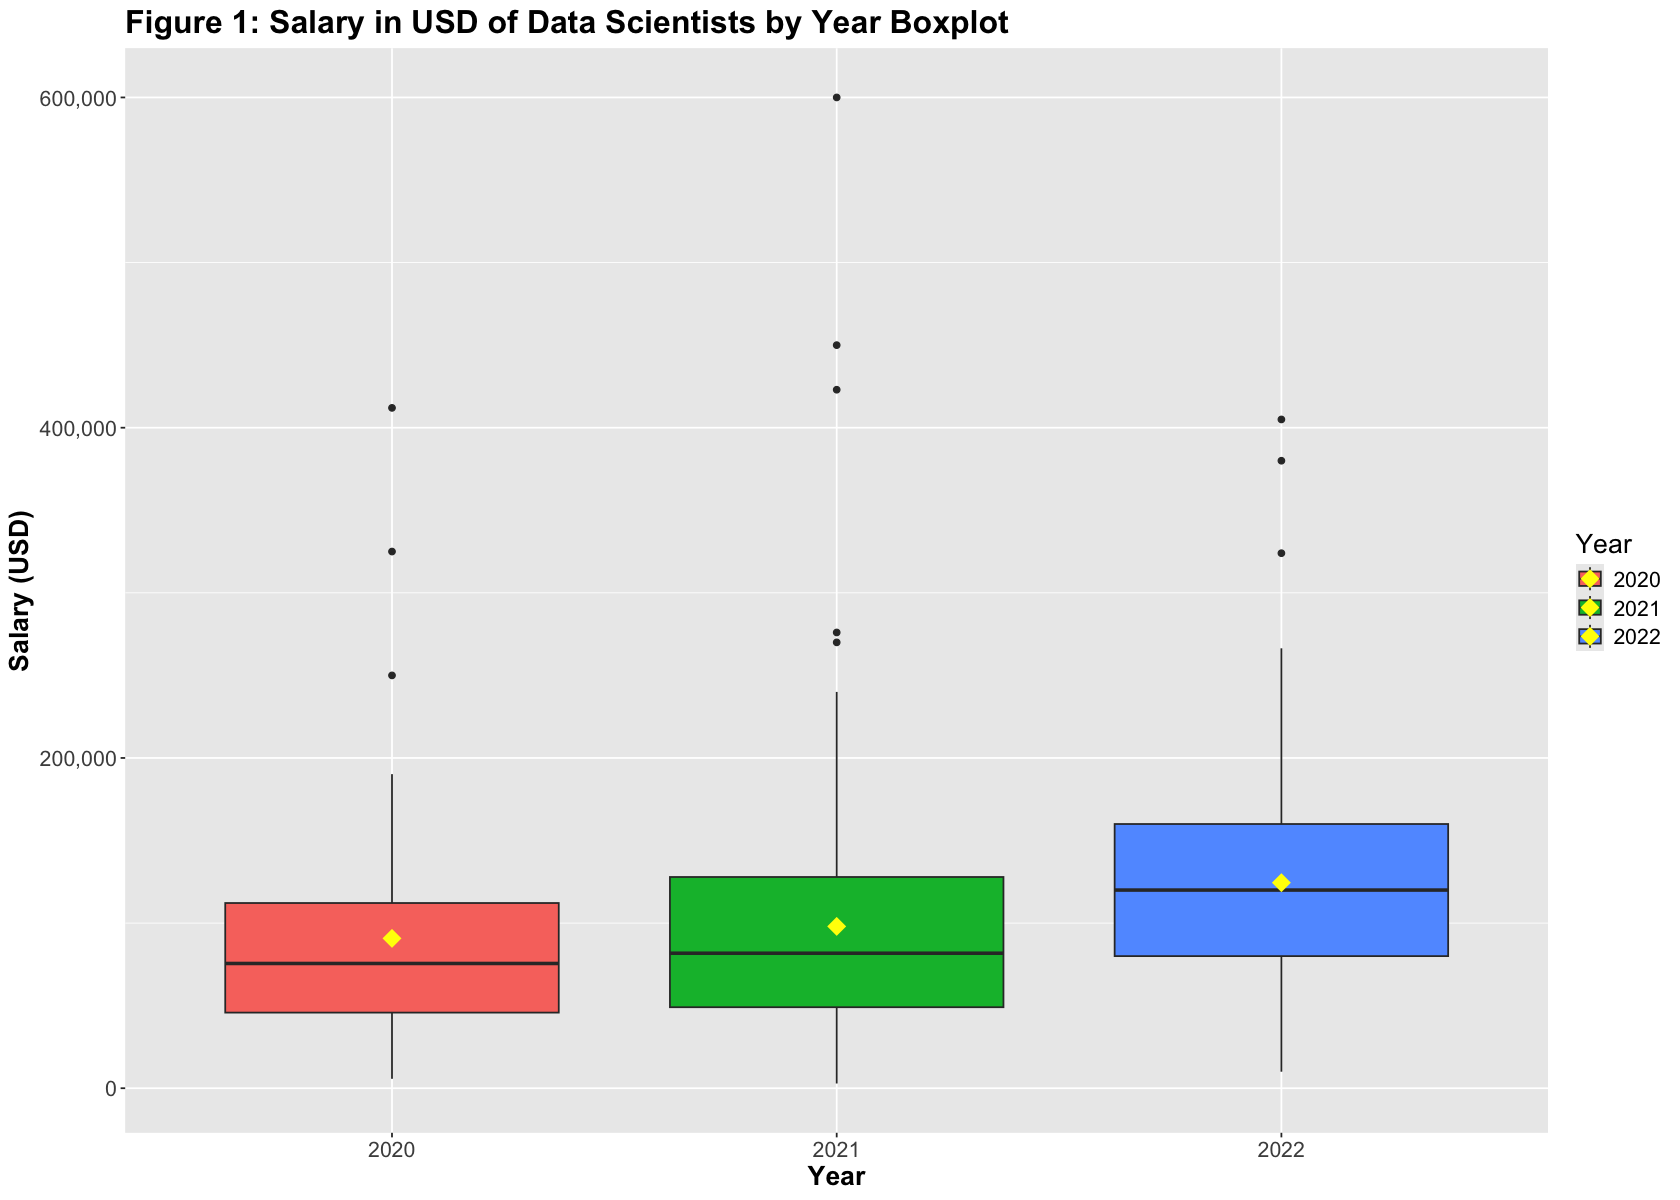

In [15]:
#Boxplot for salary in USD and year. A point is added indicating the mean.
salary_in_usd_work_year_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = work_year, y = salary_in_usd, fill = work_year)) +
    labs(x = "Year",
         y = "Salary (USD)",
         title = "Figure 1: Salary in USD of Data Scientists by Year Boxplot",
         fill = "Year") +
    stat_summary(aes(x = work_year, y = salary_in_usd, fill = work_year),
        fun = "mean", 
        colour = "yellow", 
        geom = "point", 
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_work_year_boxplots

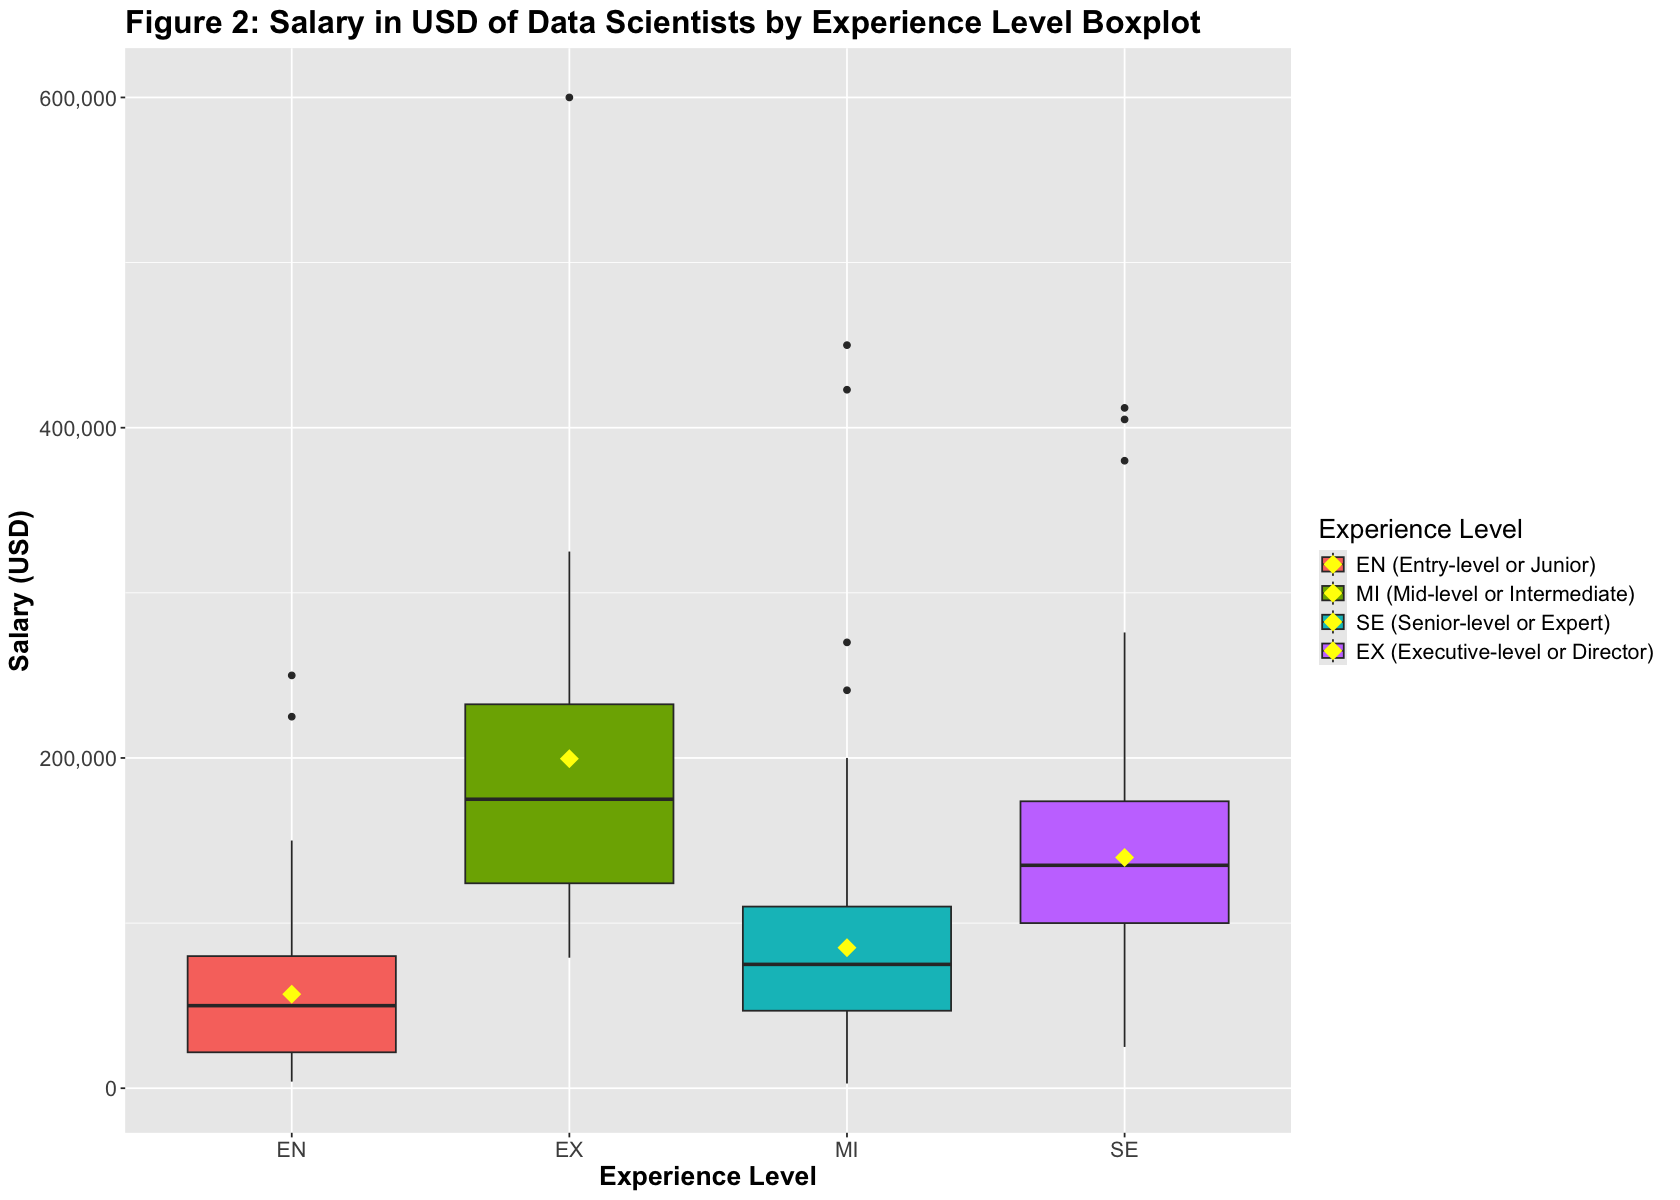

In [16]:
#Boxplot for salary in USD and experience level. A point is added indicating the mean.
salary_in_usd_experience_level_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = experience_level, y = salary_in_usd, fill = experience_level)) +
    labs(x = "Experience Level",
         y = "Salary (USD)",
         title = "Figure 2: Salary in USD of Data Scientists by Experience Level Boxplot",
         fill = "Experience Level") +
    stat_summary(aes(x = experience_level, y = salary_in_usd, fill = experience_level),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EN (Entry-level or Junior)",
                              "MI (Mid-level or Intermediate)",
                              "SE (Senior-level or Expert)",
                              "EX (Executive-level or Director)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_experience_level_boxplots

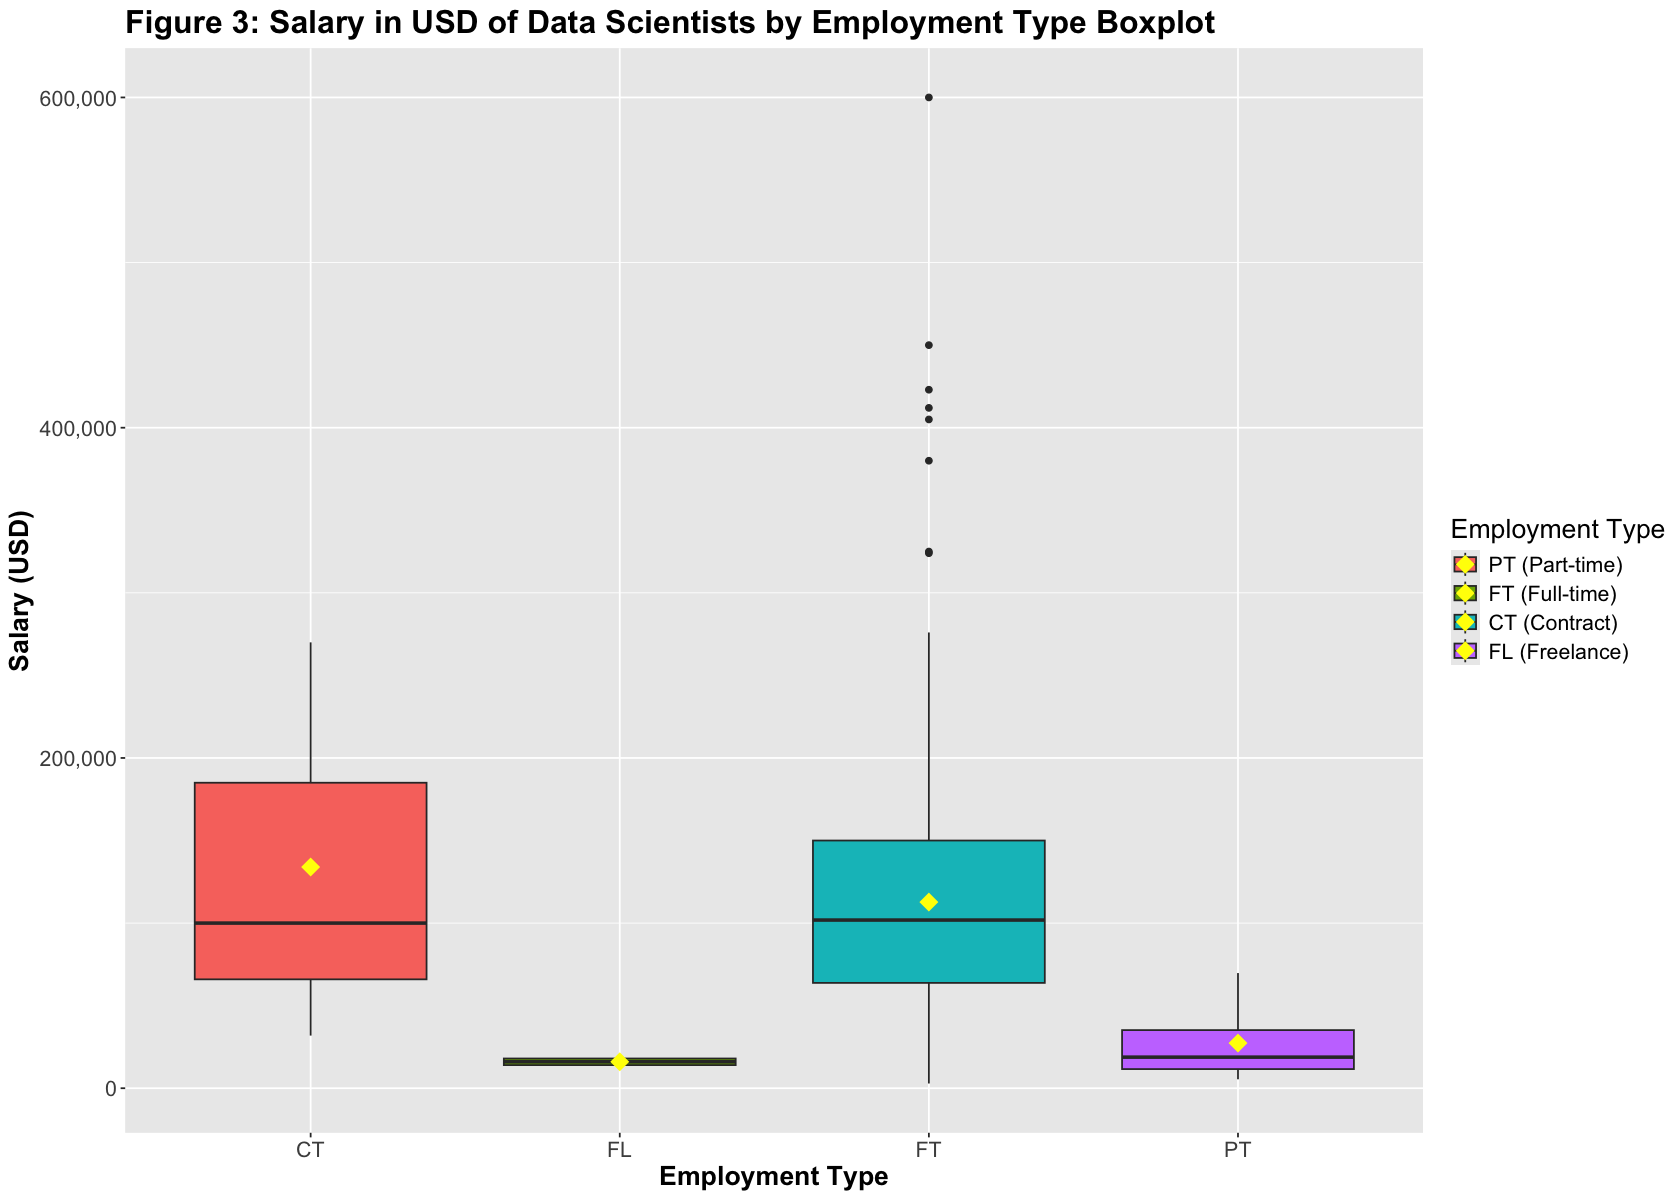

In [17]:
#Boxplot for salary in USD and employment type. A point is added indicating the mean.
salary_in_usd_employment_type_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = employment_type, y = salary_in_usd, fill = employment_type)) +
    labs(x = "Employment Type",
         y = "Salary (USD)",
         title = "Figure 3: Salary in USD of Data Scientists by Employment Type Boxplot",
         fill = "Employment Type") +
    stat_summary(aes(x = employment_type, y = salary_in_usd, fill = employment_type),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("PT (Part-time)",
                              "FT (Full-time)",
                              "CT (Contract)",
                              "FL (Freelance)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_employment_type_boxplots

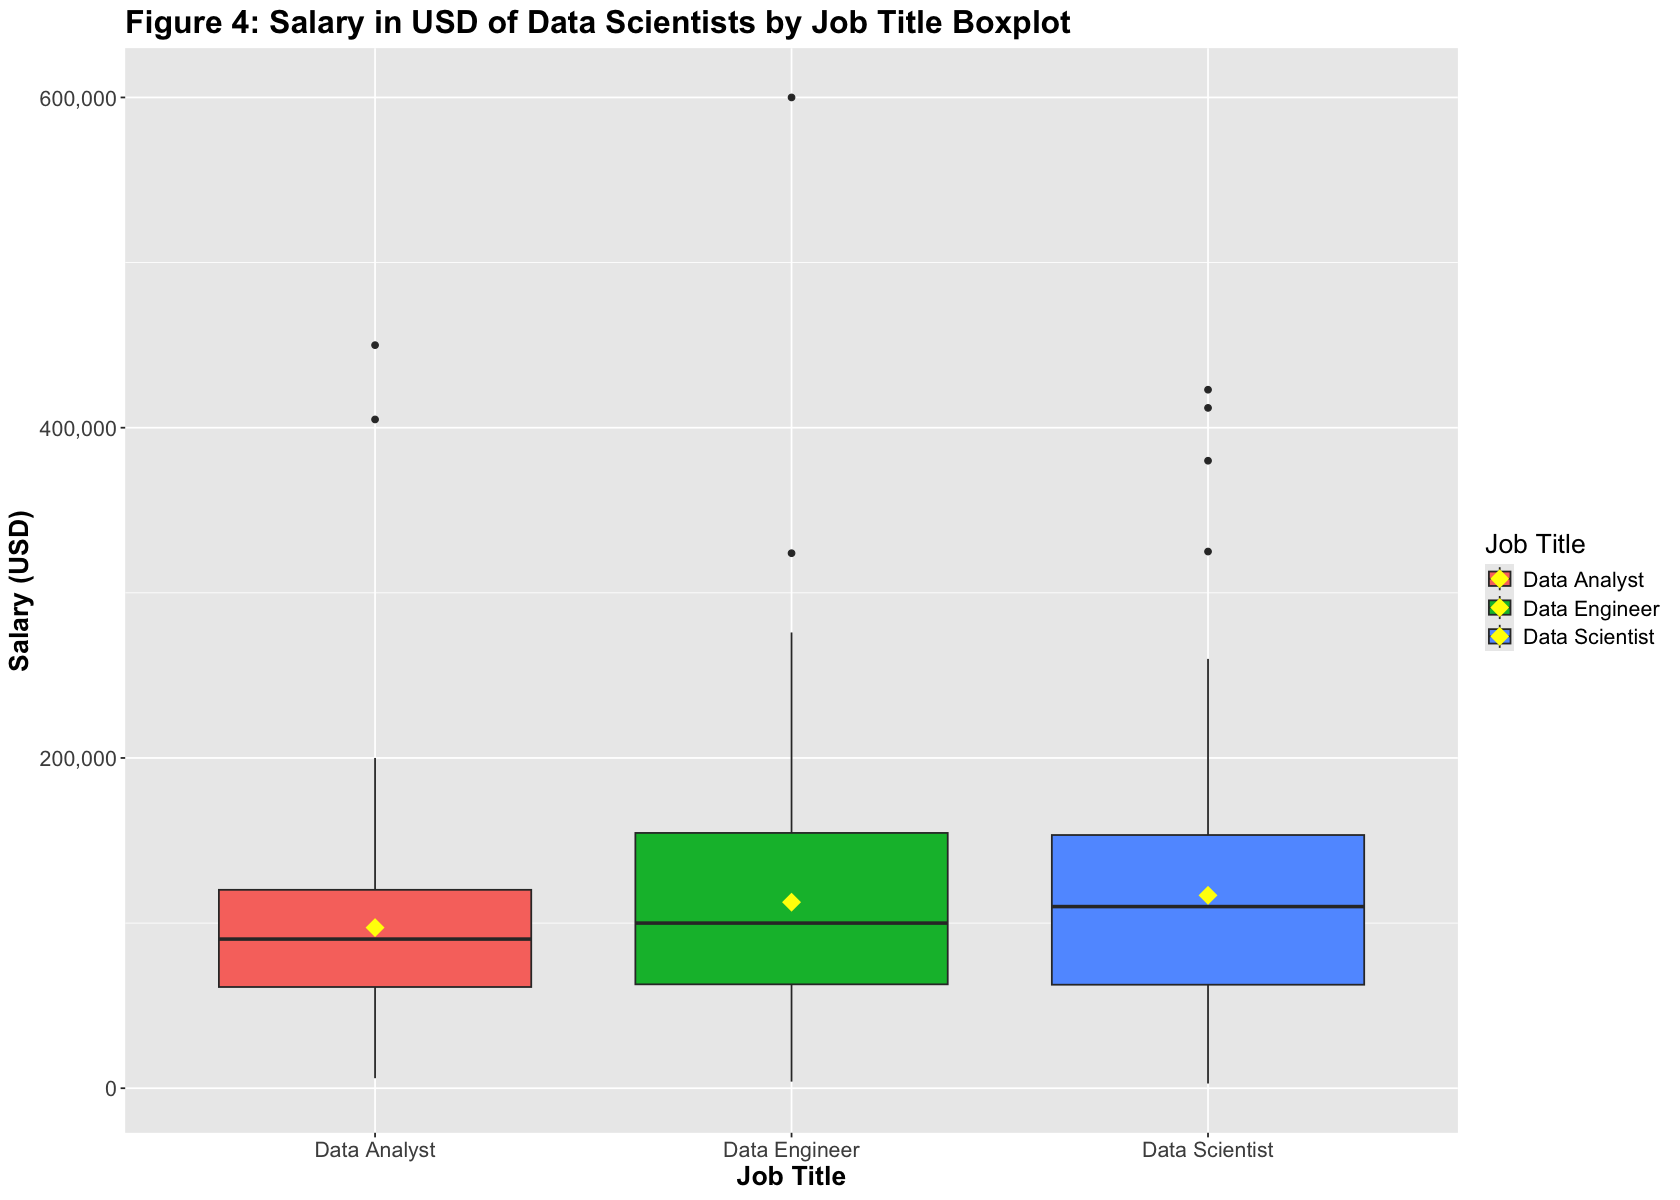

In [18]:
#Boxplot for salary in USD and job title. A point is added indicating the mean.
salary_in_usd_job_title_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = job_title, y = salary_in_usd, fill = job_title)) +
    labs(x = "Job Title",
         y = "Salary (USD)",
         title = "Figure 4: Salary in USD of Data Scientists by Job Title Boxplot",
         fill = "Job Title") +
    stat_summary(aes(x = job_title, y = salary_in_usd, fill = job_title),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_job_title_boxplots

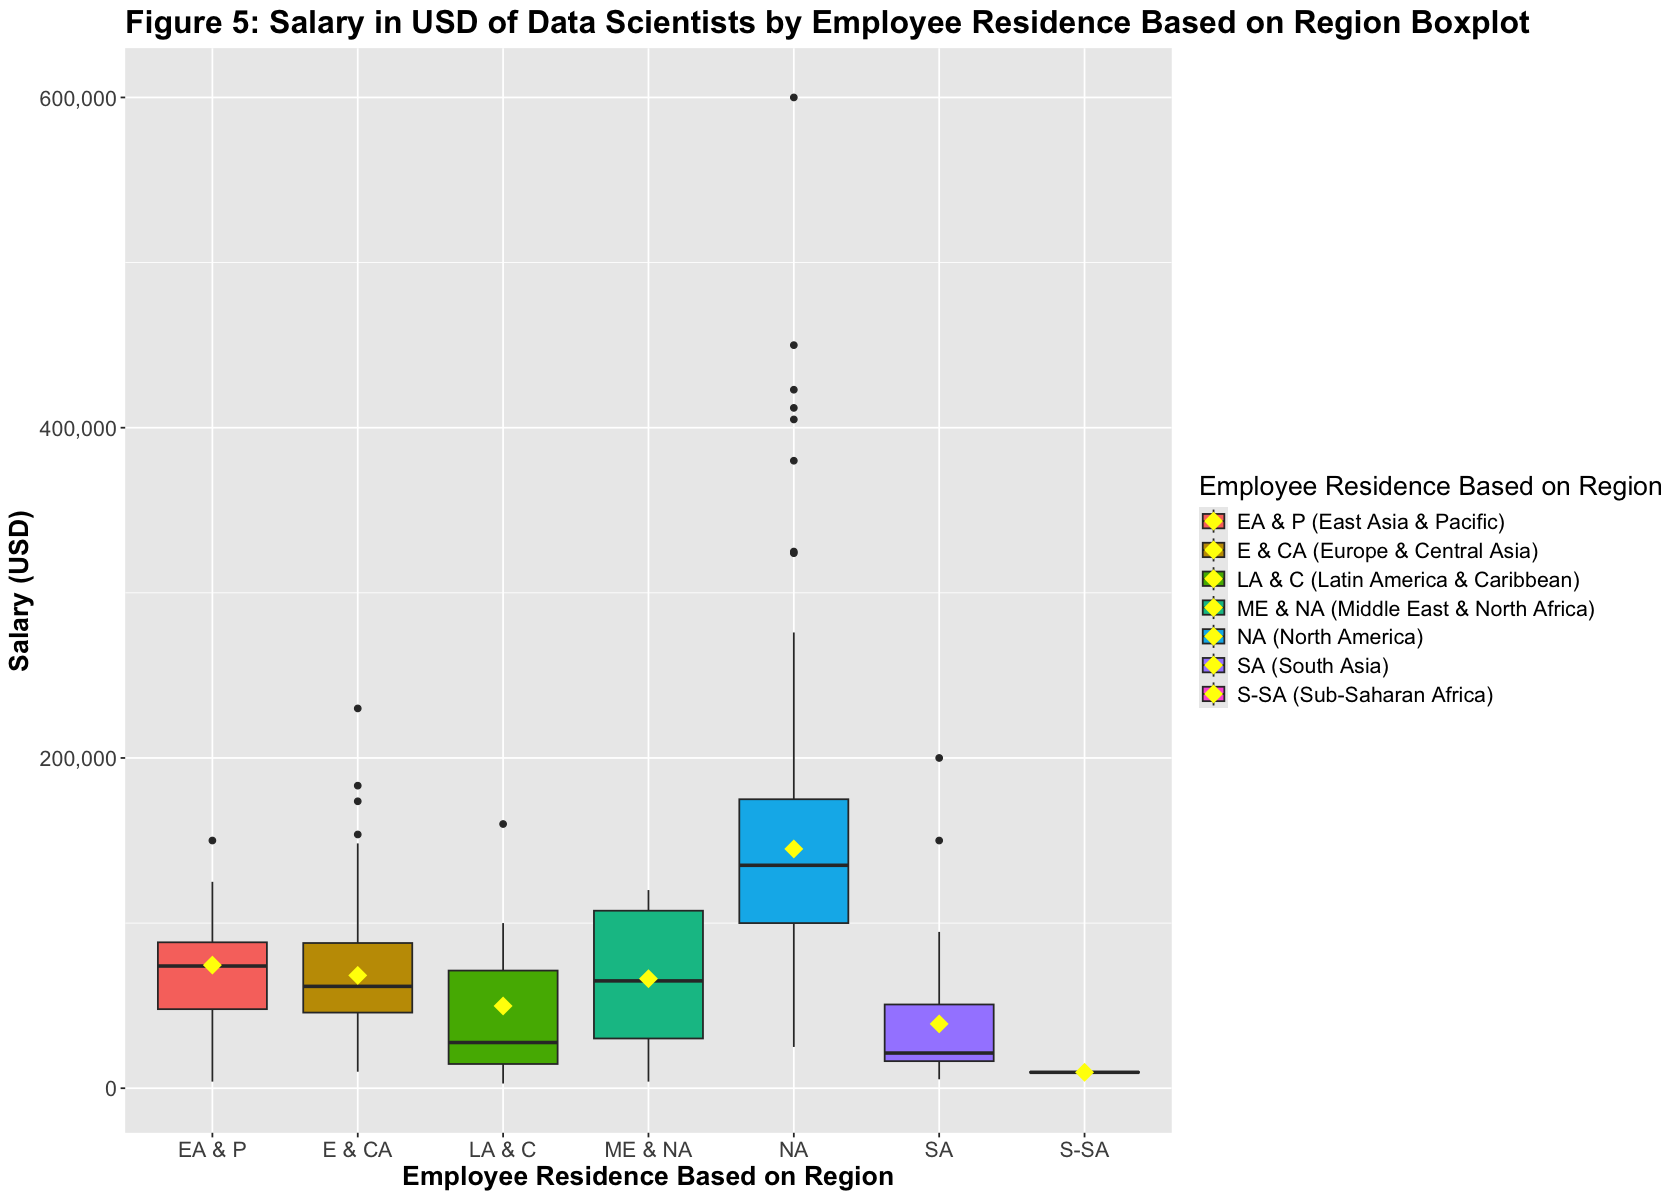

In [19]:
#Boxplot for salary in USD and employee residence. A point is added indicating the mean.
salary_in_usd_employee_residence_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = employee_residence, y = salary_in_usd, fill = employee_residence)) +
    labs(x = "Employee Residence Based on Region",
         y = "Salary (USD)",
         title = "Figure 5: Salary in USD of Data Scientists by Employee Residence Based on Region Boxplot",
         fill = "Employee Residence Based on Region") +
    stat_summary(aes(x = employee_residence, y = salary_in_usd, fill = employee_residence),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_x_discrete(labels = c("EA & P", 
                                  "E & CA", 
                                  "LA & C", 
                                  "ME & NA", 
                                  "NA", 
                                  "SA", 
                                  "S-SA")) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EA & P (East Asia & Pacific)", 
                              "E & CA (Europe & Central Asia)", 
                              "LA & C (Latin America & Caribbean)", 
                              "ME & NA (Middle East & North Africa)", 
                              "NA (North America)", 
                              "SA (South Asia)", 
                              "S-SA (Sub-Saharan Africa)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_employee_residence_boxplots

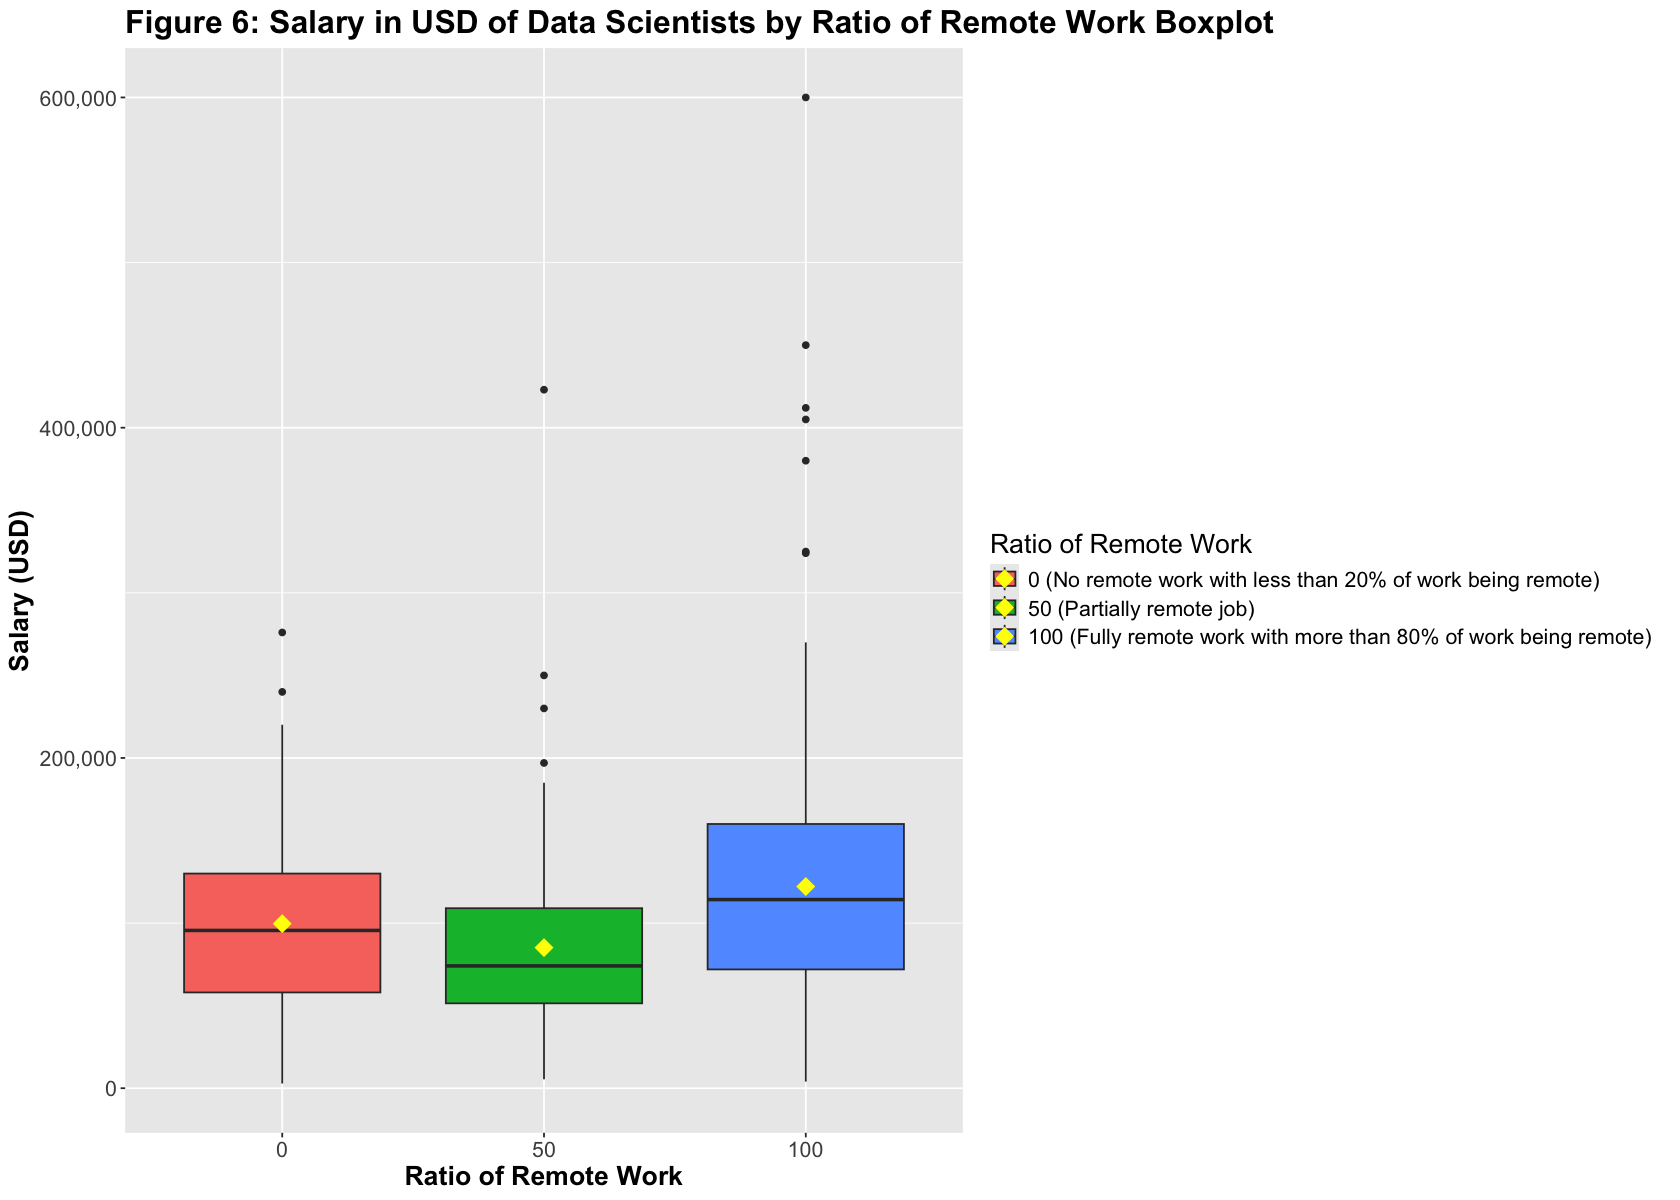

In [20]:
#Boxplot for salary in USD and the ratio of remote work. A point is added indicating the mean.
salary_in_usd_remote_ratio_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio)) +
    labs(x = "Ratio of Remote Work",
         y = "Salary (USD)",
         title = "Figure 6: Salary in USD of Data Scientists by Ratio of Remote Work Boxplot",
         fill = "Ratio of Remote Work") +
    stat_summary(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("0 (No remote work with less than 20% of work being remote)",
                              "50 (Partially remote job)",
                              "100 (Fully remote work with more than 80% of work being remote)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_remote_ratio_boxplots

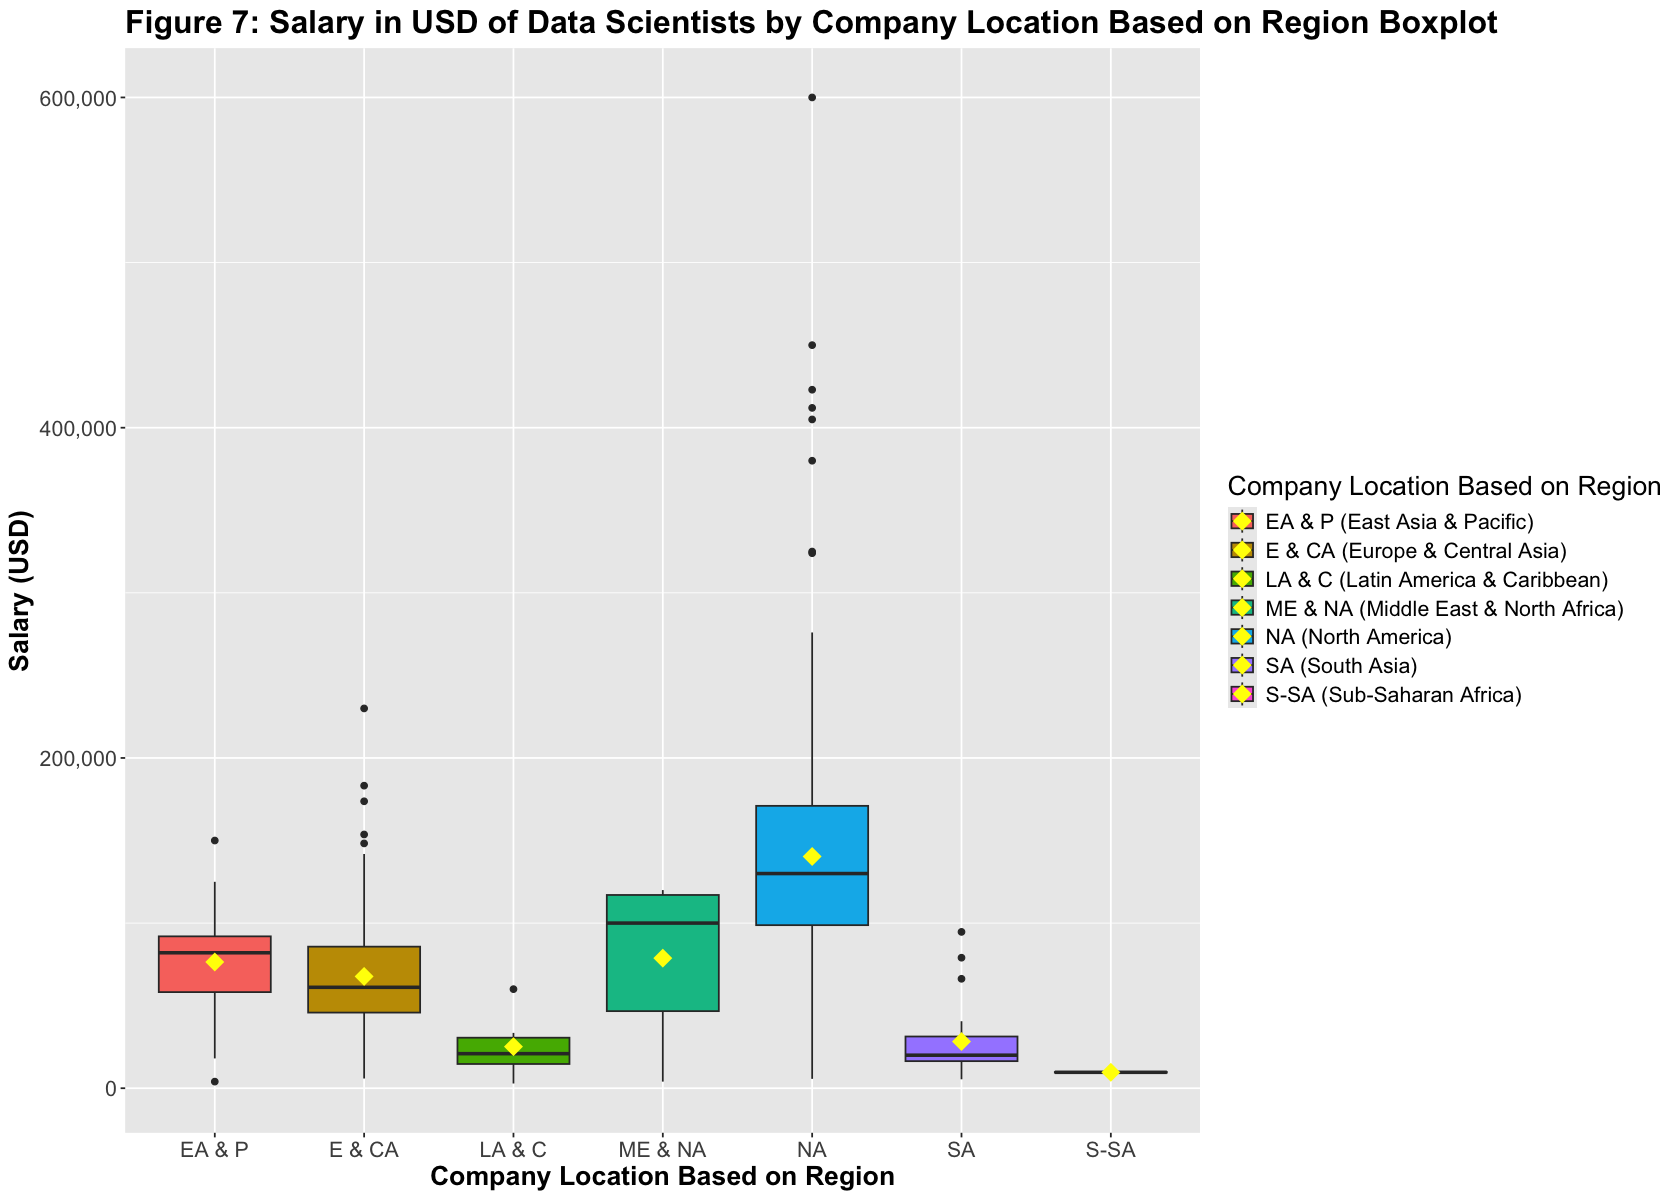

In [21]:
#Boxplot for salary in USD and company location. A point is added indicating the mean.
salary_in_usd_company_location_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = company_location, y = salary_in_usd, fill = company_location)) +
    labs(x = "Company Location Based on Region",
         y = "Salary (USD)",
         title = "Figure 7: Salary in USD of Data Scientists by Company Location Based on Region Boxplot",
         fill = "Company Location Based on Region") +
    stat_summary(aes(x = company_location, y = salary_in_usd, fill = company_location),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_x_discrete(labels = c("EA & P", 
                                  "E & CA", 
                                  "LA & C", 
                                  "ME & NA", 
                                  "NA", 
                                  "SA", 
                                  "S-SA")) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EA & P (East Asia & Pacific)", 
                              "E & CA (Europe & Central Asia)", 
                              "LA & C (Latin America & Caribbean)", 
                              "ME & NA (Middle East & North Africa)", 
                              "NA (North America)", 
                              "SA (South Asia)", 
                              "S-SA (Sub-Saharan Africa)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

  

salary_in_usd_company_location_boxplots

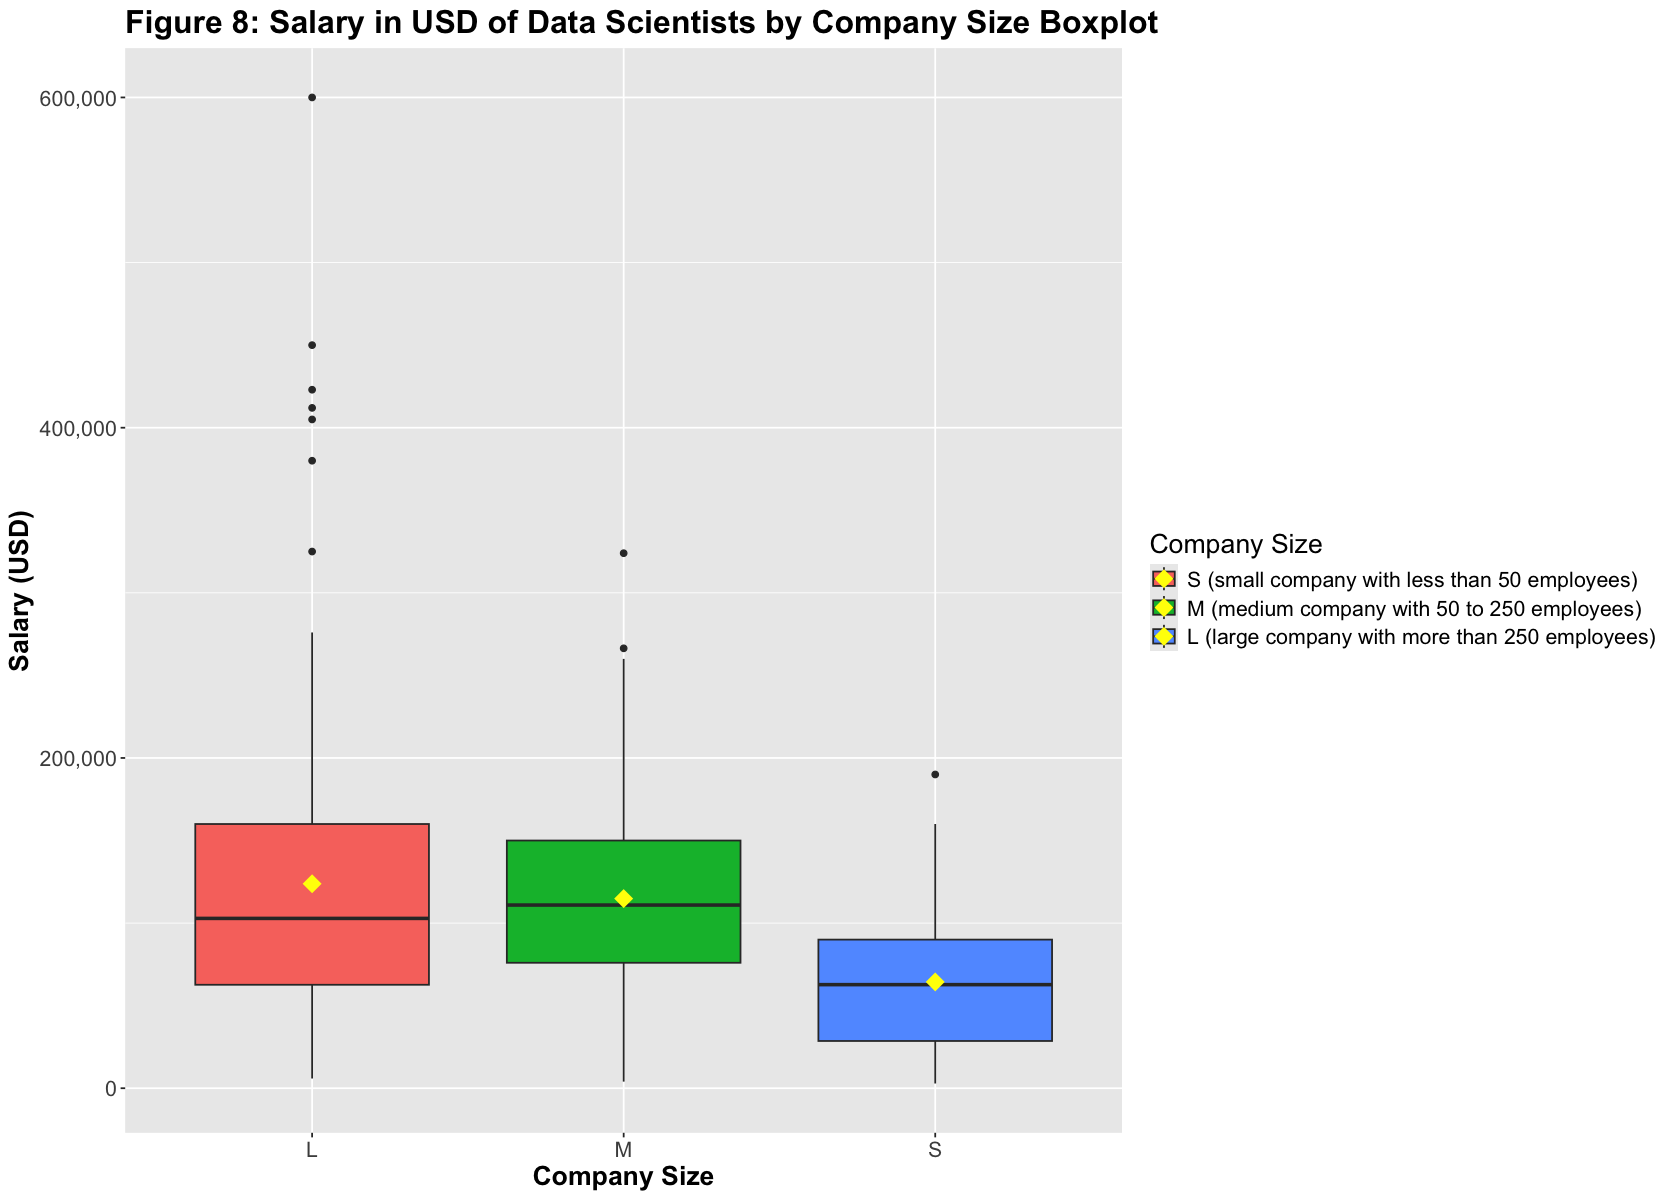

In [22]:
#Boxplot for salary in USD and company size. A point is added indicating the mean.
salary_in_company_size_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = company_size, y = salary_in_usd, fill = company_size)) +
    labs(x = "Company Size",
         y = "Salary (USD)",
         title = "Figure 8: Salary in USD of Data Scientists by Company Size Boxplot",
         fill = "Company Size") +
    stat_summary(aes(x = company_size, y = salary_in_usd, fill = company_size), 
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("S (small company with less than 50 employees)",
                              "M (medium company with 50 to 250 employees)",
                              "L (large company with more than 250 employees)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_company_size_boxplots

After viewing each visualization, a few notable observations appeared. The first is the similarity between the boxplots of `company_location` and `employee_residence` (only the Latin America & Caribbean boxplot look noticeably different). This could suggest that these variables are similar, might have data that overlaps with each other, and can potentially be correlated (non-independent), which means one of the variables might be excluded from the final model. The boxplots for `work_year` and `job_title` are also slightly similar. Logically, it is likely that this is a coincidence in the data, as it is fairly unlikely that year would be correlated with job titles, but it is still a possibility based on the visualizations. Another notable observation is that the variables with boxplots that appeared the most to be the most different were `experience_level`, `employment_type`, `company_location`, and `employee_residence`. This indicates it is likely that there is some association between salary in USD and these variables. So these variables will likely be the variables that will be included in the model we fit to the data.

In [23]:
# Fit an additive multiple linear regression model
mlr_model <- lm(salary_in_usd ~ experience_level + employment_type + company_location + employee_residence, data = ds_salaries_train)

# Display the summary of the model to see coefficients and statistics
tidy(mlr_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),129877.567,37585.729,3.4555021,5.994104e-04
experience_levelEX,122017.414,14229.347,8.5750536,1.466581e-16
experience_levelMI,18795.510,8221.263,2.2862071,2.268909e-02
experience_levelSE,45634.855,8509.550,5.3627812,1.291497e-07
employment_typeFL,-94677.565,52355.611,-1.8083557,7.119427e-02
employment_typeFT,-66791.030,34641.174,-1.9280822,5.445087e-02
employment_typePT,-89321.961,39523.334,-2.2599804,2.428234e-02
company_locationEurope & Central Asia,-30397.444,25074.269,-1.2122963,2.260119e-01
company_locationLatin America & Caribbean,-100045.123,43669.987,-2.2909355,2.241175e-02


Interpretation: Coefficient Analysis

Here is our coefficient analysis based on the information provided by Table 1.




will b done later...

will b done later...